In [1]:
%cd ".."

/Users/yuta-fu/naist/diy-hyperspectral


In [2]:
import matplotlib.pyplot as plt
from experiment import *
from experiment_setup import *
import tape_data
import numpy as np
import glob

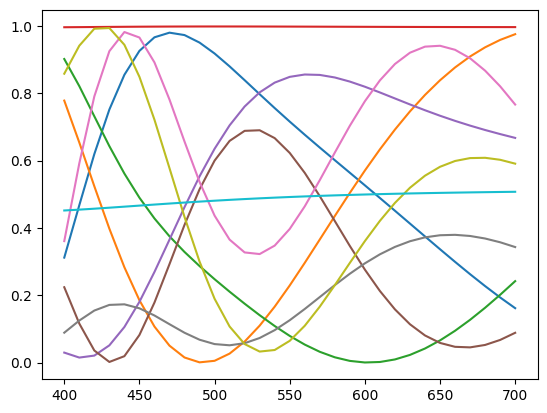

In [15]:
wp_hd = Waveplate(tape_data.THICKNESS_HD, tape_data.BIREFRINGENCE_HD)
wp_ss = Waveplate(tape_data.THICKNESS_SS, tape_data.BIREFRINGENCE_SS)

config1  = Config([129.7,   0.0],  75.1, [wp_hd, wp_ss])
config2  = Config([ 45.4,  91.0],   1.7, [wp_hd, wp_ss])
config3  = Config([172.0, 127.5],  83.7, [wp_hd, wp_ss])
config4  = Config([ 92.7,   3.4],   3.0, [wp_hd, wp_ss])
config5  = Config([104.8,  52.8], 179.5, [wp_hd, wp_ss])
config6  = Config([111.5, 102.3],  75.2, [wp_hd, wp_ss])
config7  = Config([125.6, 144.6],  19.6, [wp_hd, wp_ss])
config8  = Config([102.7, 116.5], 130.8, [wp_hd, wp_ss])
config9  = Config([152.7,   9.8],  51.7, [wp_hd, wp_ss])
config10 = Config([177.2,  86.8],  41.9, [wp_hd, wp_ss])

configs = np.array([config1, config2, config3, config4, config5, config6, config7, config8, config9, config10])

for config in configs:
    plt.plot(wavelengths, config.transmission(wavelengths))

In [8]:
## measured scene file
img_files = glob.glob('./naist_pbl/data/checker/[0-9]_crop.png')
img_files.sort()

measurements = []

for i, f in enumerate(img_files):
    meas = Measurement( plt.imread(f)[...,:3], i )
    measurements.append(meas)

print(img_files)

['./naist_pbl/data/checker/0_crop.png', './naist_pbl/data/checker/1_crop.png', './naist_pbl/data/checker/2_crop.png', './naist_pbl/data/checker/3_crop.png', './naist_pbl/data/checker/4_crop.png', './naist_pbl/data/checker/5_crop.png', './naist_pbl/data/checker/6_crop.png', './naist_pbl/data/checker/7_crop.png', './naist_pbl/data/checker/8_crop.png', './naist_pbl/data/checker/9_crop.png']


In [9]:
# Find centers of squares
cc_y = np.array([0, 1, 2, 3], dtype = np.uint8) * 35 + 20
cc_x = np.array([0, 1, 2, 3, 4, 5], dtype = np.uint8) * 32 + 25

buf = 5

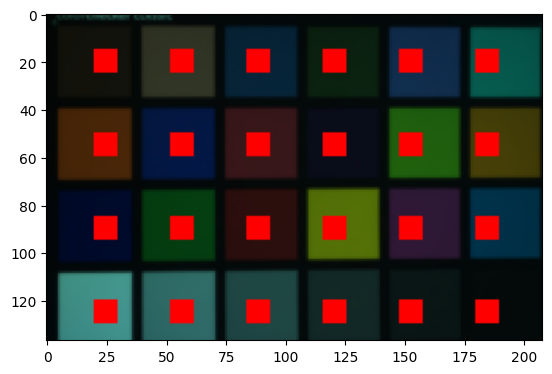

In [10]:
meas_cp = np.copy(measurements[0].data)
for i in range(len(cc_x)):
    x = int(cc_x[i])
    for j in range(len(cc_y)):
        y = int(cc_y[j])
        meas_cp[y-buf:y+buf, x-buf:x+buf, :] = np.array([1., 0., 0.])

plt.imshow(meas_cp)
plt.show()

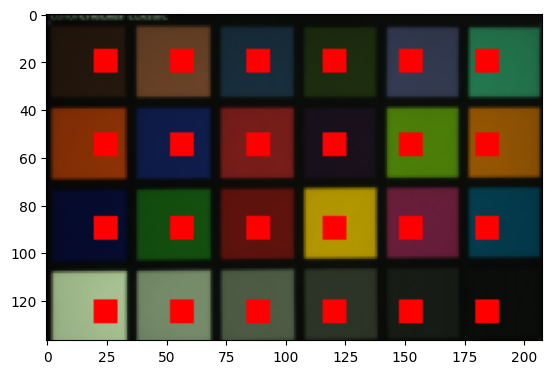

In [11]:
wb = Measurement(plt.imread('./naist_pbl/data/checker/white_balance_crop.png')[...,:3], 0)

wb_copy = np.copy(wb.data)
for i in range(len(cc_x)):
    x = int(cc_x[i])
    for j in range(len(cc_y)):
        y = int(cc_y[j])
        wb_copy[y-buf:y+buf, x-buf:x+buf, :] = np.array([1., 0., 0.])

plt.imshow(wb_copy)
plt.show()

In [12]:
for m in measurements:
    cc_tmp = np.zeros((24, 3))

    for i in range(len(cc_x)):
        x = int(cc_x[i])

        for j in range(len(cc_y)):
            y = int(cc_y[j])
            cc_tmp[j * 6 + i, :] = np.mean(m.data[y-buf : y+buf, x-buf : x+buf, :], axis = (0, 1))

    m.data = cc_tmp

In [13]:
cc_wb = np.zeros((24, 3))

for i in range(len(cc_x)):
    x = int(cc_x[i])

    for j in range(len(cc_y)):
        y = int(cc_y[j])

        cc_wb[j * 6 + i, :] = np.mean(wb.data[y-buf : y+buf, x-buf : x+buf, :], axis = (0, 1))

meas_wb = [ Measurement(cc_wb, 0) ]

In [17]:
sensor_response_wb, illuminant_coefs_wb = white_balance(meas_wb, sensor_known = False, illum_known = False)
illum_wb = E.transpose() @ illuminant_coefs_wb.transpose()

  3%|▎         | 3/100 [00:00<00:03, 25.56it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 13%|█▎        | 13/100 [00:00<00:02, 37.81it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 17%|█▋        | 17/100 [00:00<00:02, 31.70it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 21%|██        | 21/100 [00:00<00:02, 32.94it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 30%|███       | 30/100 [00:00<00:02, 30.91it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 39%|███▉      | 39/100 [00:01<00:01, 35.30it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 49%|████▉     | 49/100 [00:01<00:01, 38.16it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 54%|█████▍    | 54/100 [00:01<00:01, 39.17it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 62%|██████▏   | 62/100 [00:01<00:01, 35.52it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 70%|███████   | 70/100 [00:02<00:00, 36.81it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 78%|███████▊  | 78/100 [00:02<00:00, 38.21it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 86%|████████▌ | 86/100 [00:02<00:00, 34.53it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 91%|█████████ | 91/100 [00:02<00:00, 30.83it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

 95%|█████████▌| 95/100 [00:02<00:00, 31.88it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

100%|██████████| 100/100 [00:03<00:00, 32.87it/s]


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値が見つかりました。

目的関数が最適性の許容誤差値の範囲内の実行可能な方向
において非減少であり、制約が制約の許容誤差値の範囲内で
満たされているため、最適化は完了しました。


制約を満たす最小値

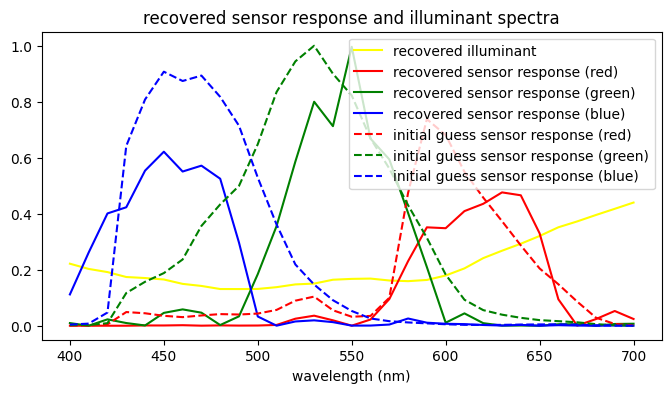

In [18]:
fig, axs = plt.subplots(1, 1, figsize = (8, 4))
axs.plot(wavelengths, illum_wb, color = 'yellow', label = 'recovered illuminant')
axs.plot(wavelengths, sensor_response_wb[0,:], color = 'red', label = 'recovered sensor response (red)')
axs.plot(wavelengths, sensor_response_wb[1,:], color = 'green', label = 'recovered sensor response (green)')
axs.plot(wavelengths, sensor_response_wb[2,:], color = 'blue', label = 'recovered sensor response (blue)')
axs.plot(wavelengths, sensor_response[0,:], color = 'red', linestyle = '--', label = 'initial guess sensor response (red)')
axs.plot(wavelengths, sensor_response[1,:], color = 'green', linestyle = '--', label = 'initial guess sensor response (green)')
axs.plot(wavelengths, sensor_response[2,:], color = 'blue', linestyle = '--', label = 'initial guess sensor response (blue)')
axs.set_xlabel('wavelength (nm)')
axs.set_title('recovered sensor response and illuminant spectra')
plt.legend()
plt.show()

In [19]:
filters = np.array([config.transmission(wavelengths) for config in configs])

# Run optimization with white balance correction
exp = Experiment(wavelengths, sensor_response_wb, filters, measurements, B, E)
reconstructed_spectra, _ = opt.reconstruct_blind(exp, alpha = 1.0, a = illuminant_coefs_wb)

(8, 30) (30, 8, 12) (1, 12)


sum squared error (all squares): 2.6732380951151296
avg squared error (per square):  0.11138492062979706


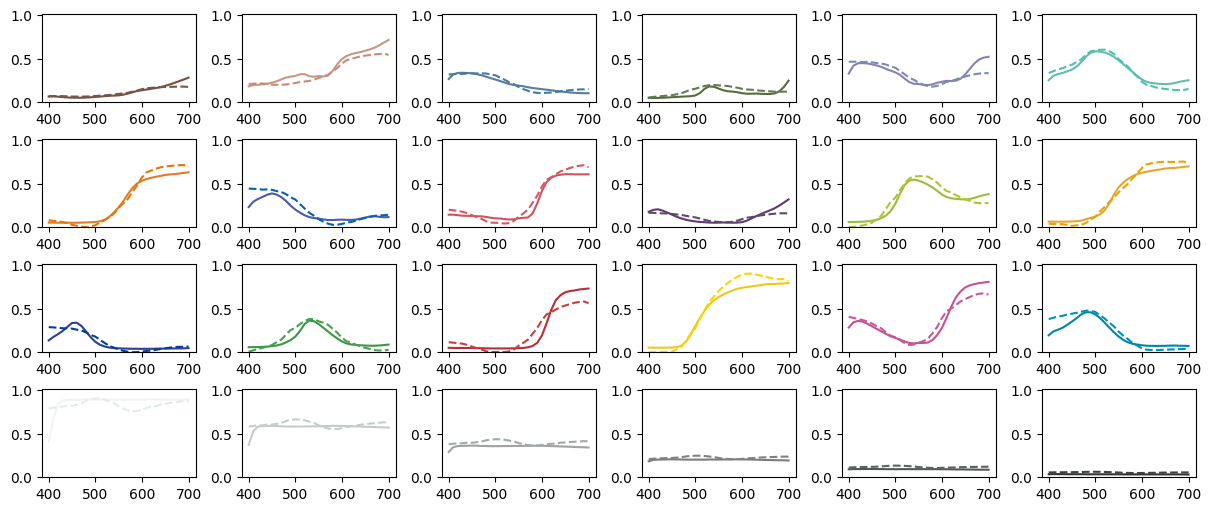

In [20]:
x = 4
y = 6
ns = reconstructed_spectra.shape[0]

sum_sq_err = 0.
fig, axs = plt.subplots(x, y, figsize=(12,5), constrained_layout=True)
 
for i in range(x):
    for j in range(y):
        k = i * y + j
        if k >= ns:
            continue

        gt = cc_spectra[k,:]
        rc = reconstructed_spectra[k,:]
 
        diff = gt - rc
        sum_sq_err += np.sum(diff * diff)

        rgb_gt = color_utils.spec2rgb(wavelengths, gt)
        rgb_rc = color_utils.spec2rgb(wavelengths, rc)

        axs[i,j].plot(wavelengths, gt, label='ground truth ' + str(i), color=rgb_gt, linestyle='-')
        axs[i,j].plot(wavelengths, rc, label='reconstructed ' + str(i), color=rgb_rc, linestyle='--')
        axs[i,j].set_ylim(0, 1.01)
        axs[i,j].set_xticks(np.arange(wavelengths[0], wavelengths[-1]+1., 100.))

print('sum squared error (all squares): ' + str(sum_sq_err))
print('avg squared error (per square):  ' + str(sum_sq_err / ns))

In [ ]:
## Good Work !!!